# 🧠 KeelerApp · Political Analytics Simulation (v1.0)

# M00 - Executive One-Liner & How to Run -->

**One-liner.** Synthetic demo showing how tone and topic (local vs national) shape *split-ticket* tendencies in an urban municipality — with fully transparent analytics.

**Run.** Execute the notebook top-to-bottom (*Kernel → Restart & Run All*).  
All code is pure-Python; no proprietary models, data, or prompts are used here.


# M01 — Project Header & Legal Disclaimer

## Modeling Split-Ticket Voting in an Urban Municipality (Synthetic Demo)

**Author:** Alexandra Bustos Frati, PhD  
**Organization:** KeelerApp — Applied AI & Political Data Science  
**Version:** 0.2 (Public Demo) • **License:** CC-BY-NC (Educational use only)

**Disclaimer.** This notebook uses **fully synthetic data**. It illustrates KeelerApp’s methodology for qualitative-to-quantitative analysis in political contexts.  
**No client data, no proprietary prompts, no internal kernels** are used or revealed here.



# M02 — Purpose & Analytical Scope

# 🎯 Purpose and Scope

**Purpose.**  
Simulate a small-scale, **urban-only** experiment that shows how qualitative focus-group style content can be transformed into quantitative indicators related to **split-ticket voting** (voting differently in local vs national races).

**What this notebook includes:**
1. **Synthetic Data** — Three **urban neighborhoods**: *High-income*, *Middle-income*, and *Working-class*.  
   Each neighborhood generates short, simulated statements (“utterances”).
2. **Automated Analysis** — Lightweight scoring: sentiment, **local vs national signals**, and a **split index** (probability of differentiating local from national choice).
3. **Visualizations** — Clear plots (matplotlib only): split by neighborhood, signal mix, age×sentiment scatter.
4. **Interpretive Narration** — Plain-English explanations after each code cell (for non-technical political consultants).
5. **Methodology & Ethics** — Notes on reproducibility, guardrails, and limits of synthetic demos.

> This is **not** a product drop; it’s a public-facing **competence demo** that mirrors KeelerApp’s analytic thinking without revealing proprietary internals.


# Structural Index (v1.0)

| Nº      | Section                                               | Symbol | Purpose                                                      |
| ------- | ----------------------------------------------------- | ------ | ------------------------------------------------------------ |
| **1.0** | Environment Setup                                     | 🔧     | Ensure reproducibility and consistent visual context         |
| **2.0** | Data Synthesis & Feature Construction                 | 🧩     | Generate synthetic dataset and engineered signals            |
| **3.0** | Analytical Exploration & Model Transparency           | 📊     | Analyze correlations, regressions, and interpretive patterns |
| **4.0** | Strategic Interpretation — Seeing Behavior in Context | 📈     | Translate analytic outputs into strategic insight            |
| **5.0** | Methodological Reflection & Ethics                    | ⚙️     | Document design rationale, guardrails, and reproducibility   |
| **6.0** | KeelerApp Framing — From Simulation to Strategy       | 🧭     | Connect analytic practice with the Tetradic Framework        |


---

# 1.0 🔧 Environment Setup
### Notebook rendering, traceability and visual style configuration

This section ensures all plots render properly inside Jupyter,
each run is uniquely identified, and the overall aesthetic is consistent
with KeelerApp’s visual language.
<!-- Section: 1.0 Environment Setup -->
---


In [38]:
#C01 — Core Imports & Seed Setup

# KeelerApp · Split-Vote Simulation (Urban, 3 neighborhoods)
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

random.seed(42)
np.random.seed(42)

pd.set_option("display.max_colwidth", 120)


In [25]:
# [C02] Backend Activation & Render Check
"""
Forces matplotlib to render inline within Jupyter
and confirms that the backend is active.
"""

%matplotlib inline

import matplotlib
print("Matplotlib backend:", matplotlib.get_backend())



Matplotlib backend: inline


In [26]:
# [C03] Trace Metadata (Run ID & Timestamp)
"""
Generates a unique run identifier and timestamp for reproducibility tracking.
"""

import uuid, datetime as dt
RUN_ID = uuid.uuid4().hex[:8]
RUN_TS = dt.datetime.now().isoformat(timespec="seconds")
print(f"KeelerApp SplitVote Demo | run_id={RUN_ID} | ts={RUN_TS}")


KeelerApp SplitVote Demo | run_id=b6e8ce73 | ts=2025-10-17T16:52:38


In [27]:
# [C04] Matplotlib Visual Style Configuration
"""
Sets a clean visual style for all plots.
Falls back gracefully if seaborn-v0_8 is unavailable.
"""

import matplotlib.pyplot as plt

try:
    plt.style.use('seaborn-v0_8-whitegrid')
except Exception:
    plt.style.use('seaborn-whitegrid')

plt.rcParams['axes.facecolor'] = '#fafafa'
plt.rcParams['figure.facecolor'] = '#ffffff'
plt.rcParams['axes.edgecolor'] = '#444444'
plt.rcParams['axes.labelcolor'] = '#222222'
plt.rcParams['axes.titleweight'] = 'bold'


# M03: Explainer — Core Imports & Seed Logic

### What this code does

- Imports only **standard, widely available** Python libraries.
- Sets seeds for **reproducibility** (so results remain stable across runs).
- Expands table display for readable text snippets.


---

# 2.0 🧩 Data Synthesis & Feature Construction
### Context definition (neighborhoods), vocabularies and text templates

This section configures the urban context for the demo and
the lexicons that will be used to generate synthetic utterances.
<!-- Section: 2.0 Data Synthesis -->
---


In [28]:
# [C05] Synthetic Context Definition (Urban Neighborhoods & Lexicons)

# --- Urban municipality with 3 neighborhoods ---
neighborhoods = [
    {
        "nid": "N1",
        "label": "High-income Neighborhood",
        "size": 60,
        "age_range": (22, 70),
        "gender_mix": ["Female","Male"],
        # Tends to emphasize municipal management (services/order); less macro-friction
        "p_local_signal": 0.65,
        "p_national_signal": 0.35,
        "sentiment_bias": +0.10   # slightly more positive tone
    },
    {
        "nid": "N2",
        "label": "Middle-income Neighborhood",
        "size": 60,
        "age_range": (20, 65),
        "gender_mix": ["Female","Male","Non-binary"],
        # Balanced attention to local and national
        "p_local_signal": 0.55,
        "p_national_signal": 0.55,
        "sentiment_bias": 0.00
    },
    {
        "nid": "N3",
        "label": "Working-class Neighborhood",
        "size": 60,
        "age_range": (18, 60),
        "gender_mix": ["Female","Male"],
        # More friction with macro agenda (inflation/economy)
        "p_local_signal": 0.50,
        "p_national_signal": 0.70,
        "sentiment_bias": -0.15   # slightly more negative tone
    },
]

# Vocabularies for synthetic “signals”
lex_pos = ["improvement", "safer", "jobs", "services", "trust", "nearby", "practical", "order"]
lex_neg = ["taxes", "paperwork", "crime", "potholes", "far", "corruption", "promises", "expensive", "inflation"]
lex_local = ["neighborhood", "municipal", "mayor", "clinic", "trash collection", "square", "traffic", "ordinance"]
lex_national = ["president", "economy", "inflation", "dollar", "congress", "nation", "ministry"]

# Simple text templates to produce synthetic utterances
templates = [
    "In {scope} I notice {sent_word} but I'm concerned about {neg_word}.",
    "{scope} matters for {issue1} and {issue2}; the rest feels {neg_word}.",
    "I feel {sent_word} when I think about {scope}, although {neg_word} weighs on me.",
    "{scope} should focus on {issue1}; the other stuff is too {neg_word}.",
]


# M04: Explainer — Why These Parameters

### Why these parameters
- We emulate **three urban neighborhoods** with different **attention profiles**:
  - *High-income* → more local-management talk, mildly positive tone.  
  - *Middle-income* → balanced attention to local & national topics.  
  - *Working-class* → stronger exposure to national/economic stressors.
- **Local/National “signals”** are simply word lists. If an utterance contains those words, we mark the signal.  
  This is deliberately simple and transparent for demo purposes.


In [32]:
# [C06] Synthetic Data Generation & Split Logic

"""
Builds the synthetic dataset:
- Functions to generate utterances, detect signals, and score sentiment.
- Row-wise loop over neighborhoods to create individuals.
- Simulated national/local preferences and split flag.
"""

def synth_utterance(scope="local"):
    sent_word = random.choice(lex_pos)
    neg_word  = random.choice(lex_neg)
    issue1    = random.choice(lex_local + lex_national)
    issue2    = random.choice(lex_local + lex_national)
    t = random.choice(templates)
    return t.format(scope=scope, sent_word=sent_word, neg_word=neg_word, issue1=issue1, issue2=issue2)

def simple_sentiment(text, bias=0.0):
    score = 0
    t = str(text).lower()
    for w in lex_pos:
        if w in t: score += 1
    for w in lex_neg:
        if w in t: score -= 1
    # Neighborhood bias as ±1 nudge
    score = score + (1 if bias>0 and np.random.rand()<abs(bias) else 0) - (1 if bias<0 and np.random.rand()<abs(bias) else 0)
    return score  # >0 positive, <0 negative

def has_any(text, vocab):
    t = str(text).lower()
    return int(any(w in t for w in vocab))

rows = []
for n in neighborhoods:
    for _ in range(n["size"]):
        age = np.random.randint(*n["age_range"])
        gender = random.choice(n["gender_mix"])

        # Choose scope emphasis (local vs national)
        talk_local = np.random.rand() < n["p_local_signal"]
        talk_national = np.random.rand() < n["p_national_signal"]
        if talk_local and talk_national:
            scope_txt = random.choice(["local","the nation"])
        elif talk_local:
            scope_txt = "local"
        elif talk_national:
            scope_txt = "the nation"
        else:
            scope_txt = random.choice(["local","the nation"])

        txt = synth_utterance(scope=scope_txt)
        sent = simple_sentiment(txt, bias=n["sentiment_bias"])

        rows.append({
            "neighborhood_id": n["nid"],
            "neighborhood": n["label"],
            "age": age,
            "gender": gender,
            "text": txt,
            "sentiment": sent,
            "has_local_signal": has_any(txt, lex_local),
            "has_national_signal": has_any(txt, lex_national),
        })

df = pd.DataFrame(rows)

# Simulate preferences & split probability (depends on signals, sentiment, neighborhood)
base_nat = np.where(np.random.rand(len(df)) < 0.55, "Coalition A", "Coalition B")
adj_by_neigh = df["neighborhood"].map({
    "High-income Neighborhood": -0.03,  # a bit more resistant to split
    "Middle-income Neighborhood": 0.00,
    "Working-class Neighborhood": +0.05 # a bit more prone to split
}).fillna(0)

split_prob = (
    0.12
    + 0.12*df["has_national_signal"]
    + 0.12*(df["sentiment"] < 0)
    - 0.07*df["has_local_signal"]
    + adj_by_neigh
)

local_choice = []
for i, nat in enumerate(base_nat):
    flip = np.random.rand() < np.clip(split_prob.iloc[i], 0, 0.9)
    local_choice.append(
        "Coalition B" if (flip and nat=="Coalition A") else
        ("Coalition A" if (flip and nat=="Coalition B") else nat)
    )

df["national_pref"] = base_nat
df["local_pref"] = np.array(local_choice)
df["split_vote"] = (df["national_pref"] != df["local_pref"]).astype(int)

df.head(5)


,neighborhood_id,neighborhood,age,gender,text,sentiment,has_local_signal,has_national_signal,national_pref,local_pref,split_vote
0,N1,High-income Neighborhood,27,Male,In local I notice nearby but I'm concerned about promises.,0,0,0,Coalition A,Coalition A,0
1,N1,High-income Neighborhood,59,Male,"I feel services when I think about local, although taxes weighs on me.",0,0,0,Coalition B,Coalition B,0
2,N1,High-income Neighborhood,43,Female,the nation matters for mayor and municipal; the rest feels potholes.,-1,1,1,Coalition B,Coalition B,0
3,N1,High-income Neighborhood,57,Female,the nation should focus on economy; the other stuff is too potholes.,-1,0,1,Coalition A,Coalition A,0
4,N1,High-income Neighborhood,51,Male,"I feel jobs when I think about local, although crime weighs on me.",0,0,0,Coalition B,Coalition B,0


# M05: Explainer — What We Just Built

### What We Just Built
- A **synthetic dataset** for an urban municipality with three neighborhoods.  
- Each row is one person with: age, gender, a short utterance, **sentiment score**, and **local/national signals**.  
- We simulate a **split probability**: national signals + negative tone → higher split; strong local signals → lower split; neighborhoods adjust this baseline.
- This is **transparent and non-proprietary** by design: easy to read, easy to modify.


Total records: 180

Cases per neighborhood:


,n_cases
neighborhood,
High-income Neighborhood,60
Middle-income Neighborhood,60
Working-class Neighborhood,60



Split-vote by neighborhood (%):


,split_%
neighborhood,
Working-class Neighborhood,31.7
Middle-income Neighborhood,30.0
High-income Neighborhood,20.0



Signal mix by neighborhood (% of utterances containing the signal):


,Local %,National %
neighborhood,,
High-income Neighborhood,30.0,60.0
Middle-income Neighborhood,33.3,73.3
Working-class Neighborhood,31.7,85.0


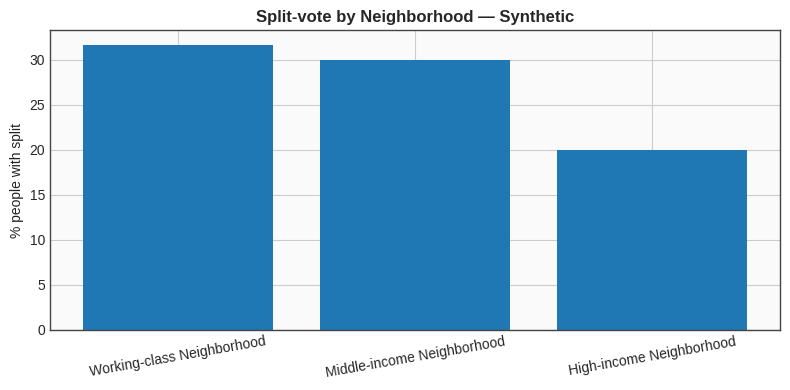

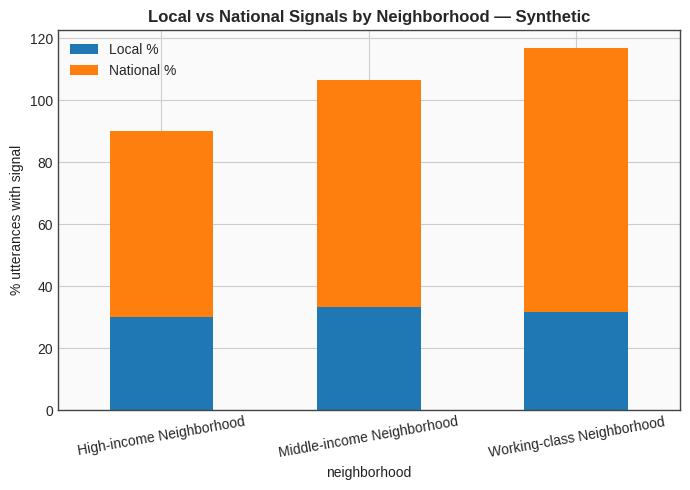

In [33]:
# [C07] Sanity Checks & Base Plots (Split & Signals)
"""
Quick distribution checks and two baseline plots:
- Split-vote by neighborhood (bar)
- Local vs national signals by neighborhood (stacked bar)
"""

print("Total records:", len(df))

print("\nCases per neighborhood:")
display(df["neighborhood"].value_counts().to_frame("n_cases"))

print("\nSplit-vote by neighborhood (%):")
split_by_n = (
    df.groupby("neighborhood")["split_vote"]
      .mean().mul(100).round(1)
      .sort_values(ascending=False)
)
display(split_by_n.to_frame("split_%"))

print("\nSignal mix by neighborhood (% of utterances containing the signal):")
signals = (
    df.groupby("neighborhood")[["has_local_signal","has_national_signal"]]
      .mean().mul(100).round(1)
      .rename(columns={"has_local_signal":"Local %","has_national_signal":"National %"})
)
display(signals)

# Plot 1 — Split by neighborhood
plt.figure(figsize=(8,4))
plt.bar(split_by_n.index, split_by_n.values)
plt.title("Split-vote by Neighborhood — Synthetic")
plt.ylabel("% people with split")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

# Plot 2 — Signal mix (stacked)
ax = signals.plot(kind="bar", stacked=True, figsize=(7,5))
ax.set_title("Local vs National Signals by Neighborhood — Synthetic")
ax.set_ylabel("% utterances with signal")
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


---

# 3.0 📊 Analytical Exploration & Model Transparency
### Correlations, regression, and interpretive visualization

This section explores how the synthetic indicators behave:
how sentiment, local, and national signals interact,
and how to maintain transparency and interpretability in applied political analytics.
<!-- Section: 3.0 Analytical Exploration -->
---


,sentiment,has_local_signal,has_national_signal,split_vote
sentiment,1.00,-0.53,-0.34,-0.19
has_local_signal,-0.53,1.00,0.07,0.09
has_national_signal,-0.34,0.07,1.00,0.21
split_vote,-0.19,0.09,0.21,1.00


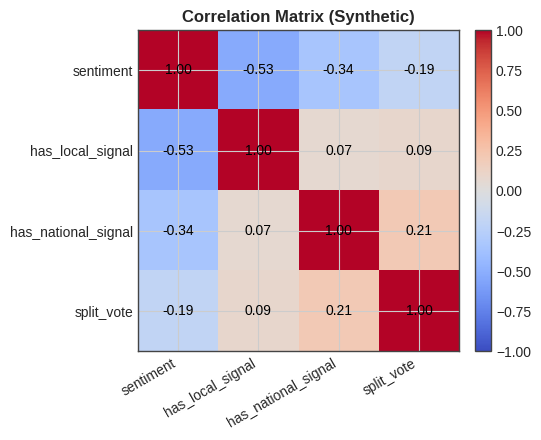

In [34]:
# [C08] Correlation Matrix & Heatmap (Synthetic)
"""
Explores pairwise correlations among key variables:
sentiment, local/national signal flags, and split_vote.
Shows relationships visually in a color-coded matrix.
"""

corr_cols = ["sentiment", "has_local_signal", "has_national_signal", "split_vote"]
corr = df[corr_cols].corr().round(2)
display(corr)

# Heatmap (matplotlib)
fig, ax = plt.subplots(figsize=(5.5, 4.5))
im = ax.imshow(corr.values, cmap="coolwarm", vmin=-1, vmax=1)
ax.set_xticks(range(len(corr_cols))); ax.set_xticklabels(corr_cols, rotation=30, ha="right")
ax.set_yticks(range(len(corr_cols))); ax.set_yticklabels(corr_cols)

# Annotate cells with correlation values
for (i, j), v in np.ndenumerate(corr.values):
    ax.text(j, i, f"{v:.2f}", ha="center", va="center", fontsize=10, color="black")

ax.set_title("Correlation Matrix (Synthetic)")
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()



# M06: Explainer — Interpreting Correlations 

### Interpreting correlations (plain English)
- **sentiment → split_vote (−/+)**: In this synthetic setup, more negative tone tends to **increase** split probability.
- **has_national_signal → split_vote (+)**: National triggers (e.g., *inflation*) raise the likelihood of split.
- **has_local_signal → split_vote (−)**: Municipal/management triggers dampen split (they “anchor” local evaluation).

These signs are illustrative—**not** empirical claims. The value is **transparency**: anyone can inspect how variables relate without black boxes.


In [52]:
# [C09] Explainable Logistic Model (StatsModels) + Basic Metrics
"""
Fits a minimal logistic regression to estimate how sentiment and signals
influence split voting. Shows an interpretable summary and adds
basic evaluation metrics on the synthetic data: Pseudo R² and ROC AUC.

Note: AUC is computed with a pure-NumPy ROC implementation (no sklearn dependency).
"""

try:
    import statsmodels.api as sm
except ImportError as e:
    raise ImportError(
        "statsmodels is required. Install with: python3 -m pip install statsmodels"
    ) from e

# --- Design matrix / target
X = df[["sentiment", "has_local_signal", "has_national_signal"]].copy()
X = sm.add_constant(X)
y = df["split_vote"].astype(int).to_numpy()

# --- Fit
logit_model = sm.Logit(y, X).fit(disp=False)

# --- Display: HTML summary2 (más legible en Jupyter) + coeficientes
try:
    from IPython.display import display
    display(logit_model.summary2())
except Exception:
    print(logit_model.summary())

coefs = logit_model.params.round(3).to_frame("coef")
display(coefs)

# --- Predict probabilities
y_score = logit_model.predict(X).astype(float)

# --- Pure-NumPy ROC/AUC (no sklearn) — usando np.trapezoid (NumPy 2.x)
import numpy as np
import pandas as pd

def roc_curve_np(y_true: np.ndarray, y_prob: np.ndarray):
    order = np.argsort(-y_prob)
    yt = y_true[order]
    P = (yt == 1).sum()
    N = (yt == 0).sum()
    if P == 0 or N == 0:
        # Degenerate ROC
        fpr = np.array([0.0, 1.0])
        tpr = np.array([0.0, 1.0]) if P > 0 else np.array([0.0, 0.0])
        return fpr, tpr
    tps = np.cumsum(yt == 1)
    fps = np.cumsum(yt == 0)
    tpr = tps / P
    fpr = fps / N
    # Endpoints
    fpr = np.concatenate([[0.0], fpr, [1.0]])
    tpr = np.concatenate([[0.0], tpr, [1.0]])
    return fpr, tpr

def auc_trapz_safe(fpr: np.ndarray, tpr: np.ndarray) -> float:
    # NumPy 2.x deprecó trapz en favor de trapezoid
    if hasattr(np, "trapezoid"):
        return float(np.trapezoid(tpr, fpr))
    return float(np.trapz(tpr, fpr))  # fallback para NumPy 1.x

fpr, tpr = roc_curve_np(y, y_score)
auc_val = auc_trapz_safe(fpr, tpr)

# --- Metrics summary
pseudo_r2 = getattr(logit_model, "prsquared", np.nan)
metrics_df = pd.DataFrame({
    "metric": ["Pseudo R² (McFadden)", "ROC AUC (synthetic)"],
    "value":  [round(pseudo_r2, 3),    round(auc_val, 3)]
})
print("\nModel metrics (on synthetic data):")
display(metrics_df)



<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit             Method:            MLE      
Dependent Variable:  y                 Pseudo R-squared:  0.055    
Date:                2025-10-17 21:14  AIC:               207.2588 
No. Observations:    180               BIC:               220.0306 
Df Model:            3                 Log-Likelihood:    -99.629  
Df Residuals:        176               LL-Null:           -105.38  
Converged:           1.0000            LLR p-value:       0.0092839
No. Iterations:      6.0000            Scale:             1.0000   
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -2.1085   0.4547 -4.6377 0.0000 -2.9996 -1.2174
sentiment           -0.3946   0.2902 -1.3598 0.1739 -0.9633  0.1741
has_local_signal     0.1070   0.4115  0.2600 0.7949 -0.6995  0.9135
has_national_signal  1.0398   0.4975  2.0901 0.0366  0.0648  2.0148
===================================================================

"""

,coef
const,-2.109
sentiment,-0.395
has_local_signal,0.107
has_national_signal,1.040



Model metrics (on synthetic data):


,metric,value
0,Pseudo R² (McFadden),0.055
1,ROC AUC (synthetic),0.651


# M07: Explainer — Logistic Coefficients (How to Read) -->

- **Positive coefficient → increases** the log-odds of split; **negative → decreases**.
- Expected synthetic pattern:
  - **sentiment**: if “more positive” raises the score, you often see a **negative coef** (because split rises when tone is negative).
  - **has_national_signal**: **positive coef** (national talk pushes split up).
  - **has_local_signal**: **negative coef** (local management cues dampen split).

This is a **toy regression** to show how we’d test influence in a transparent way.  
The production stack adds validation and monitoring, but we keep the same principle: **clarity over opacity**.


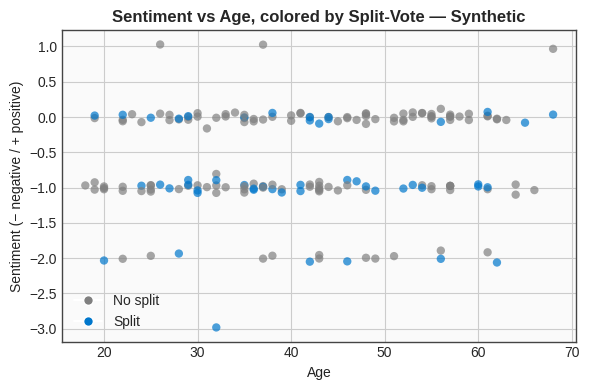

In [48]:
# [C10] Scatter: Age × Sentiment (color = split)
"""
Visualizes relationship between age and sentiment.
Color encodes split voting (1) vs non-split (0).
"""

fig, ax = plt.subplots(figsize=(6,4))
# Jitter sutil para evitar overlap vertical cuando sentiment es discreto
y = df["sentiment"] + np.random.normal(0, 0.05, size=len(df))
colors = df["split_vote"].map({0:"gray", 1:"#0077cc"})

ax.scatter(df["age"], y, c=colors, alpha=0.7, edgecolors="none")
ax.set_xlabel("Age")
ax.set_ylabel("Sentiment (− negative / + positive)")
ax.set_title("Sentiment vs Age, colored by Split-Vote — Synthetic")

# Leyenda minimalista
from matplotlib.lines import Line2D
legend_elems = [
    Line2D([0],[0], marker='o', color='w', label='No split', markerfacecolor='gray', markersize=7),
    Line2D([0],[0], marker='o', color='w', label='Split', markerfacecolor='#0077cc', markersize=7),
]
ax.legend(handles=legend_elems, frameon=False, loc="best")

plt.tight_layout()
plt.show()


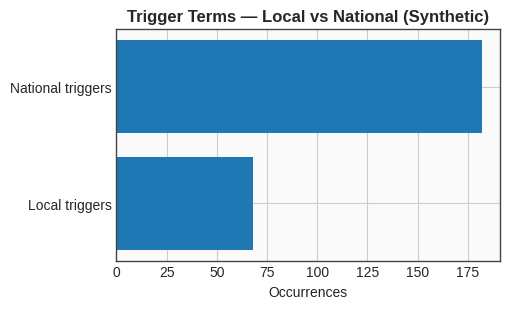

,term,count
0,Local triggers,68
1,National triggers,182


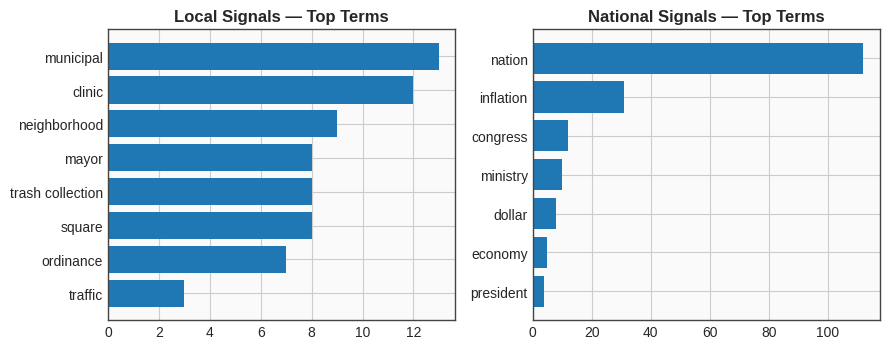

,term,count
0,municipal,13
1,clinic,12
2,neighborhood,9
3,mayor,8
4,trash collection,8
5,square,8
6,ordinance,7
7,traffic,3


,term,count
0,nation,112
1,inflation,31
2,congress,12
3,ministry,10
4,dollar,8
5,economy,5
6,president,4


In [49]:
# [C11] Trigger Terms (Aligned with lex_local / lex_national)
"""
Counts local vs national trigger terms using the same vocabularies used in generation.
Shows totals and top-k terms per family.
"""

from collections import Counter
import re, unicodedata

def normalize(s: str) -> str:
    # lower + quita acentos para comparar tokens de forma robusta
    return unicodedata.normalize('NFKD', s).encode('ascii','ignore').decode('ascii').lower()

# 1) Normalizamos corpus y vocabularios (MISMA FUENTE DE VERDAD)
corpus = [normalize(t) for t in df["text"].astype(str)]
local_vocab = [normalize(w) for w in lex_local]
nat_vocab   = [normalize(w) for w in lex_national]

# 2) Conteo total de apariciones por vocabulario (regex con límites de palabra)
def count_vocab_occurrences(corpus, vocab):
    if not vocab:
        return 0
    pattern = re.compile(r'\b(' + '|'.join(map(re.escape, vocab)) + r')\b')
    return sum(len(pattern.findall(t)) for t in corpus)

local_total = count_vocab_occurrences(corpus, local_vocab)
nat_total   = count_vocab_occurrences(corpus, nat_vocab)

counts = pd.DataFrame({
    "term": ["Local triggers", "National triggers"],
    "count": [local_total, nat_total]
})

# 3) Top-k términos dentro de cada vocabulario
def top_k_terms(corpus, vocab, k=8):
    c = Counter()
    for v in vocab:
        patt = re.compile(r'\b' + re.escape(v) + r'\b')
        c[v] = sum(len(patt.findall(t)) for t in corpus)
    return pd.DataFrame(c.most_common(k), columns=["term","count"])

top_local = top_k_terms(corpus, local_vocab, k=8)
top_nat   = top_k_terms(corpus, nat_vocab,   k=8)

# 4) Gráfico total (barras horizontales)
fig, ax = plt.subplots(figsize=(5.2, 3.2))
ax.barh(counts["term"], counts["count"])
ax.set_title("Trigger Terms — Local vs National (Synthetic)")
ax.set_xlabel("Occurrences")
plt.tight_layout()
plt.show()

display(counts)

# 5) Gráficos de detalle (top-k por familia)
fig = plt.figure(figsize=(9, 3.6))
ax1 = fig.add_subplot(1,2,1)
ax1.barh(top_local["term"], top_local["count"])
ax1.set_title("Local Signals — Top Terms")
ax1.invert_yaxis()

ax2 = fig.add_subplot(1,2,2)
ax2.barh(top_nat["term"], top_nat["count"])
ax2.set_title("National Signals — Top Terms")
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

display(top_local, top_nat)


# M08: Explainer — Trigger Terms (Why They Matter)

- **Local triggers** (e.g., “trash collection”, “mayor”, “clinic”) reinforce **tangible governance** and can dampen split.  
- **National triggers** (e.g., “inflation”, “economy”, “dollar”) often carry **macro-stress**, which can raise split.
- In real projects, these lists are **data-driven** and validated by humans (HITL).


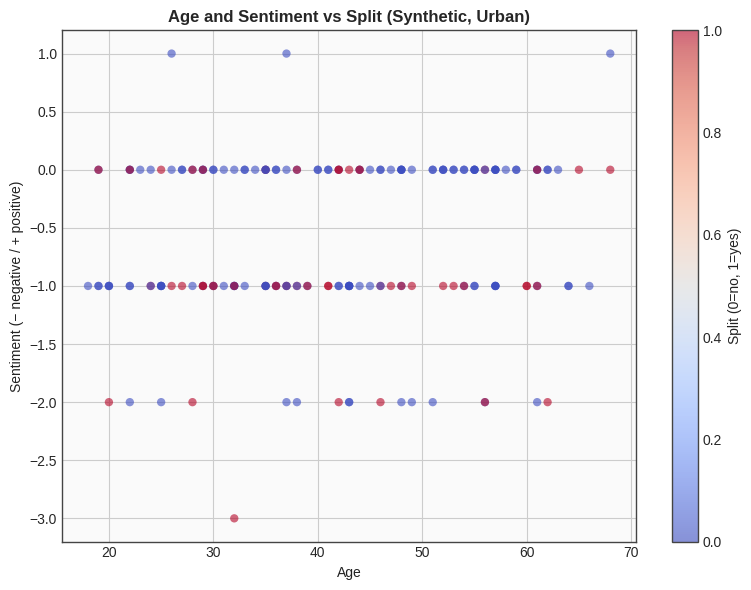

In [50]:
# [C12] Scatter: Age × Sentiment (color = split, large view)
"""
Revisits the sentiment–age space with color-coded split voting probability.
This wider view emphasizes the synthetic correlation between tone, topic, and vote differentiation.
"""

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    df["age"], df["sentiment"],
    c=df["split_vote"], cmap="coolwarm", alpha=0.6, edgecolors="none"
)
plt.title("Age and Sentiment vs Split (Synthetic, Urban)")
plt.xlabel("Age")
plt.ylabel("Sentiment (− negative / + positive)")
plt.colorbar(scatter, label="Split (0=no, 1=yes)")
plt.tight_layout()
plt.show()


# M09: Scatter`s Explainer — Interpretation (Non-Technical) 

- Each dot is a person; color indicates **whether they split** in the simulation.
- Negative sentiment (especially when talking about **national** issues) tends to **increase** split probability.
- A positive, **local-management** conversation tends to **reduce** it.


---

# 4.0 📈 Strategic Interpretation — Seeing Behavior in Context
### From simulated signals to actionable framing

This section translates synthetic analytical findings into interpretive insights,
showing how tone, topic, and scope influence openness to split voting.
<!-- Section: 4.0 Strategic Interpretation -->
---


# M10 : Strategic Interpretation — Synthetic Results & How to Read


### Strategic Interpretation — Synthetic Results as Behavioral Pattern

Even with synthetic data, a consistent **behavioral structure** emerges:
- When **macro stressors** dominate the conversation (national signals + negative tone), voters become **more open to splitting** their local from national choice.
- When **municipal performance** frames the conversation (local signals), this openness **decreases**.

**So what?** Strategy is not about predicting individuals; it’s about **shaping the frame**.  
If the frame is national-macro and negative, split rises. If the frame is local-management and concrete, split dampens.  
The demo shows **how to see the frame**, not how to manipulate it.

---

### How to Read This
- **Split-vote %** compares neighborhoods. Higher % suggests **more openness to differentiate** local from national.  
- **Signal mix** shows how much each neighborhood speaks in **local** vs **national** terms.  
- Typical pattern (synthetic): more **national** talk + **negative** tone → **higher** split; stronger **local** talk → **dampens** split.



---

# 5.0 ⚙️ Methodological Reflection & Ethics
### Transparency, simplicity, and the KeelerApp standard for reproducible intelligence

Clarifies design decisions, ethical boundaries, and how a prototype like this
scales into KeelerApp’s professional-grade analytics systems.
<!-- Section: 5.0 Methodological Reflection -->
---


# M11: Methodological Note, Visual Summary, Ethics & Next Steps


### Methodological Note — Why This Is Simple by Design
This notebook uses **synthetic data** and **transparent scoring** so every step is legible:
- Anyone can **audit** the logic (no hidden weights, no black boxes).
- Results are **reproducible** (fixed seeds, pure Python).
- The professional KeelerApp stack adds transcription, richer semantics, validation, drift monitoring, and governance dashboards — which are **not** disclosed publicly to protect clients and IP.

---

### Visual Summary
Together, these plots illustrate how tone, topic, and local context interact.  
Each visualization reflects a different layer:
- Distribution of **split behavior** (what varies)
- Balance of **signals** (why it varies)
- **Correlations and coefficients** (how it varies)
- **Scatter and triggers** (where it’s visible in discourse)

---

### Ethics & Reproducibility
- **Synthetic only**: no personal data, no real transcripts, no client context.  
- **Transparent rules**: all logic visible and intentionally simple; no black boxes.  
- **HITL mindset**: in production, human review checks interpretation and reduces bias.  
- **Reproducible**: fixed seeds; pure-Python stack.

---

### Next Steps — What a Productized System Adds
- Robust transcription, richer semantic modeling, explainable scoring.  
- Governance dashboards, audit trails (*trace IDs*), and role-based access.  
- Multi-lingual and cross-district benchmarking.

> KeelerApp’s proprietary kernels, prompts, and orchestration are **not** included in this public demo.


---

# 6.0 🧭 KeelerApp Framing — From Simulation to Strategy
### Integrating the Tetradic Model into Applied Political Intelligence

Connects the analytic logic of the notebook with
KeelerApp’s four dimensions of value: **Strategy**, **Analytics**, **Agenticity**, and **Training**.
<!-- Section: 6.0 KeelerApp Framing -->
---


# M12: KeelerApp Tetradic Framing & Beyond Simulation

## 🧭 KeelerApp Tetradic Framing

This notebook embodies KeelerApp’s **tetradic approach** to applied political intelligence:
**Strategy**, **Analytics**, **Agenticity**, and **Training**.

**Strategy.**  
The simulation illustrates how analytical prototypes can guide strategic thinking without relying on prediction.  
It reframes electoral behavior as a *system of signals*, where voters balance proximity and identity rather than ideology alone.  
By modeling this balance transparently, KeelerApp transforms data into situational insight — an operational philosophy, not just a methodology.

**Analytics.**  
All computations remain interpretable.  
Synthetic data, transparent scoring, and clear visualizations demonstrate KeelerApp’s principle:  
> “Complexity deserves clarity, not opacity.”  
No black-box modeling, no hidden coefficients — only open logic that invites critical reading.

**Agenticity.**  
The analytical flow itself acts as an *agent*: it listens, interprets, and organizes meaning.  
Agentic intelligence does not replace human judgment; it scaffolds it.  
Each loop — from utterance to interpretation — mirrors the design of KeelerApp’s multi-agent systems: modular, ethical, human-aligned.

**Training.**  
The notebook doubles as a didactic artifact.  
It can be reused for workshops, civic analytics courses, or public-policy briefings,  
showing that explainable computation can foster understanding instead of mystification.

---

### Beyond simulation

The *split-vote* is a metaphor for modern reasoning:  
humans differentiate between levels of belonging — personal, local, national —  
and political systems must learn to respect that nuance.  
KeelerApp’s work turns that insight into technology:  
**AI that does not predict behavior, but reconstructs context.**

> *From simulation to strategy, from data to understanding —  
KeelerApp builds intelligence that listens before it decides.*


In [51]:
# [C99] Reproducibility & Environment Fingerprint
"""
Leaves an execution fingerprint to support reproducibility:
- Python & platform versions
- Key library versions
- Run identifiers from this session
"""

import sys, platform

print("=== Reproducibility Fingerprint ===")
print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", matplotlib.__version__)

try:
    import statsmodels
    print("StatsModels:", statsmodels.__version__)
except Exception:
    print("StatsModels: (not available)")

try:
    import IPython
    print("IPython:", IPython.__version__)
except Exception:
    pass

# Run IDs from earlier cells (if available)
try:
    print("RUN_ID:", RUN_ID)
    print("RUN_TS:", RUN_TS)
except NameError:
    print("RUN_ID / RUN_TS not set (run C03 earlier).")


=== Reproducibility Fingerprint ===
Python: 3.10.12
Platform: Linux-6.12.10-76061203-generic-x86_64-with-glibc2.35
NumPy: 2.2.6
Pandas: 2.3.3
Matplotlib: 3.10.7
StatsModels: 0.14.5
IPython: 8.37.0
RUN_ID: b6e8ce73
RUN_TS: 2025-10-17T16:52:38
